<a href="https://colab.research.google.com/github/Katsushi-Nakanishi/Machine_Learning/blob/main/iris_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.3 MB/s eta 0:00:00


In [4]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from IPython.display import display
import sklearn

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print(f"keys of iris_dataset:\n{iris_dataset.keys()}")

keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print(f"target names: {iris_dataset['target_names']}")
print(f"feature names: {iris_dataset['feature_names']}")
print(f"Type of data: {type(iris_dataset['data'])}")
print(f"Shape of data:{iris_dataset['data'].shape}")
print(f"DESCR: \n{iris_dataset['DESCR'][:193]}\n...")


target names: ['setosa' 'versicolor' 'virginica']
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data:(150, 4)
DESCR: 
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


targetは1次元配列で格納されている(0はsetna, 1はversicolor, 2はvirginica)

In [8]:
print(f"Type of target:{type(iris_dataset['target'])}")
print(f"Shape of target:{iris_dataset['target'].shape}")
print(f"Target:\n{iris_dataset['target']}")

Type of target:<class 'numpy.ndarray'>
Shape of target:(150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0) #シャッフルするのでシード値固定

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


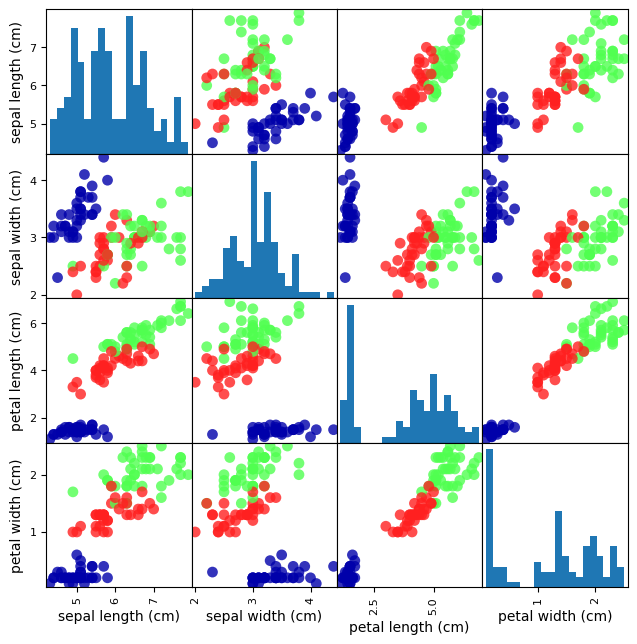

In [10]:
# データの関係をざっくりとらえる（散布図・ペアプロット）
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(7.5,7.5), marker='o',
                        hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

# k-最近傍法

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # k-最近傍法のk=1のオブジェクトを作成

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

・新しいデータに対する予測

In [13]:
X_new = np.array([[5,2.9,1,0.2]]) # 注意：sklearnの入力は常に2次元NumPy配列を想定している
print(f"X_new.shape: {X_new.shape}")

X_new.shape: (1, 4)


In [16]:
y_new_pred = knn.predict(X_new)
print(f"y_new_pred: {y_new_pred}")
print(f"Predicted target name: {iris_dataset['target_names'][y_new_pred]}")

y_new_pred: [0]
Predicted target name: ['setosa']


・モデルの評価

In [17]:
y_pred = knn.predict(X_test)
print(f"Test set predictions:\n{y_pred}")

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [19]:
print(f"Test set score:{np.mean(y_pred == y_test)}") # 正解1,不正解0の平均が正答率
print(f"Test set score:{knn.score(X_test, y_test)}")

Test set score:0.9736842105263158
Test set score:0.9736842105263158
